<a href="https://colab.research.google.com/github/yuki0703-sudo/Research/blob/main/%E3%83%AD%E3%83%90%E3%82%B9%E3%83%88%E5%88%B6%E5%BE%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def linestyle_generator():#グラフをプロットするときの線種を決めるジェネレータ
  linestyle=['-','--','-.',':']
  lineID=0
  while True:
    yield linestyle[lineID]
    lineID=(lineID+1)%len(linestyle)

def plot_set(fig_ax,*args):#グラフを整える関数
  fig_ax.set_xlabel(args[0]) #x軸のラベルを一つ目の引数で指定
  fig_ax.set_ylabel(args[1]) #y軸のラベルを二つ目の引数で指定
  fig_ax.grid(ls=':')
  if len(args)==3:
    fig_ax.legend(loc=args[2]) #凡例の位置を３つ目の引数で指定

def bodeplot_set(fig_ax,*args): #ボード線図を整える関数
  #ゲイン線図のグリッドとy軸ラベルの設定
  fig_ax[0].grid(which='both',ls=':')
  fig_ax[0].set_ylabel('Gani[db]')
  #位相線図のグリッドとx軸，y軸ラベルの設定
  fig_ax[1].grid(which='both',ls=':')
  fig_ax[1].set_xlabel('$\omega$[rad/s]')
  fig_ax[1].set_ylabel('Phase[deg]')
  #凡例の表示
  if len(args)>0: #引数が１つ以上：ゲイン線図に表示
    fig_ax[1].legend(loc=args[0])
  if len(args)>1: #引数が２つ以上:位相線図にも表示
    fig_ax[0].legend(loc=args[1])

In [ ]:
!pip install control

In [ ]:
from control.matlab import *
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.7/dist-packages/control/freqplot.py:186: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/control/freqplot.py:186: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/control/freqplot.py:186: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/control/freqplot.py:186: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/control/freqplot.py:186: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/control/freqplot.py:186: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/control/freqplot.py:186: FutureWarning: 'Plot' keyword is dep

Text(0, 0.5, 'Gain of $\\Delta W_T/P& [dB]')

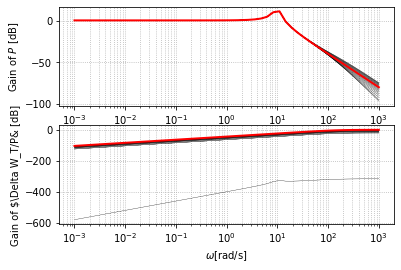

In [ ]:
#乗法的不確かさを有する制御対象
g=9.81
l=0.2
M=0.5
mu=1.5e-2
J=1.0e-2
Pn=tf([0,1],[J,mu,M*g*l])

#不確かさ
delta=np.arange(-1,1,0.1)
WT=tf([1,0],[1,150])

fig,ax=plt.subplots(2,1)

for i in range(len(delta)):
  #乗法的不確かさを持つ伝達関数P
  P=(1+delta[i]*WT)*Pn
  gain,phase,w=bode(P,logspace(-3,3),Plot=False)
  ax[0].semilogx(w,20*np.log10(gain),color='k',lw=0.3)

  #乗法的不確かさΔ(s)*WT=(P-Pn)/Pn
  DT=(P-Pn)/Pn
  gain,_,w=bode(DT,logspace(-3,3),Plot=False)
  ax[1].semilogx(w,20*np.log10(gain),color='k',lw=0.3)


#乗法的不確かさを持つ伝達関数
gain,_,w=bode(Pn,logspace(-3,3),Plot=False)
ax[0].semilogx(w,20*np.log10(gain),color='r',lw=2)

#乗法的不確かさ
gain,_,w=bode(WT,logspace(-3,3),Plot=False)
ax[1].semilogx(w,20*np.log10(gain),color='r',lw=2)

bodeplot_set(ax)
ax[0].set_xlabel('$\omega_n$')
ax[0].set_ylabel('Gain of $P$ [dB]')
ax[1].set_ylabel('Gain of $\Delta W_T/P& [dB]')

In [ ]:
!pip install slycot

  Using cached slycot-0.4.0-cp37-cp37m-linux_x86_64.whl


K=
 
   7.21 s^4 + 1098 s^3 + 3259 s^2 + 1.081e+05 s + 9.032e+04
---------------------------------------------------------------
s^5 + 165.1 s^4 + 2448 s^3 + 2.449e+04 s^2 + 2.273e+04 s + 5540

gamma= (0.9527651218302327, array([1.00000000e+00, 1.00000000e+00, 4.22515938e-09, 0.00000000e+00]))


/usr/local/lib/python3.7/dist-packages/control/freqplot.py:186: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/control/freqplot.py:186: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/control/freqplot.py:186: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/control/freqplot.py:186: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  FutureWarning)


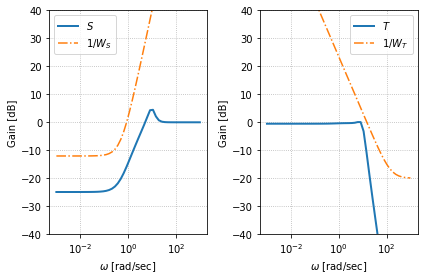

In [ ]:
#ロバスト制御の設計 混合感度問題→ガンマを最小にする制御器Kを求める
#mixsyn(sys,w1,w2,w3),sys:ノミナルモデル，w1:重み関数Ws,w3:周波数重み関数WT((1+Δ*WT)*P)．返り値：K,cl,info(γの値)
from control import mixsyn

WS=tf([0,1],[1,1,0.25])
WU=tf(1,1)
WT=tf([10,0],[1,150])

#混合感度問題
K,_,gamma=mixsyn(Pn,WS,WU,WT)
print('K=\n',ss2tf(K))
print('gamma=',gamma)

fig,ax=plt.subplots(1,2)
#感度関数(S=1/(1+PK))
Ssys=feedback(1,Pn*K)
gain,_,w=bode(Ssys,logspace(-3,3),Plot=False)
ax[0].semilogx(w,20*np.log10(gain),ls='-',lw=2,label='$S$')
gain,_,w=bode(1/WS,logspace(-3,3),Plot=False)
ax[0].semilogx(w,20*np.log10(gain),ls='-.',label='$1/W_S$')

#相補感度関数(T=PK/(1+PK))
Tsys=feedback(Pn*K,1)
gain,_,w=bode(Tsys,logspace(-3,3),Plot=False)
ax[1].semilogx(w,20*np.log10(gain),ls='-',lw=2,label='$T$')
gain,_,w=bode(1/WT,logspace(-3,3),Plot=False)
ax[1].semilogx(w,20*np.log10(gain),ls='-.',label='$1/W_T$')

for i in range(2):
  ax[i].set_ylim(-40,40)
  ax[i].legend()
  ax[i].set_xlabel('$\omega$ [rad/sec]')
  ax[i].set_ylabel('Gain [dB]')
  ax[i].grid(which='both',ls=':')
fig.tight_layout()
#感度関数S，相補感度関数Tがそれぞれ1/WS,1/WTよりも下にある

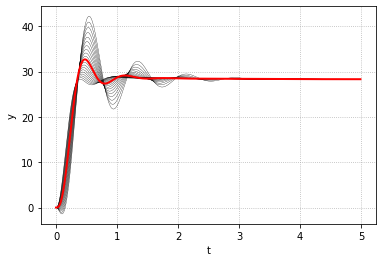

In [ ]:
ref=30
fig,ax=plt.subplots()

for i in range(len(delta)):
  P=(1+WT*delta[i])*Pn
  Gyr=feedback(P*K,1)
  y,t=step(Gyr,np.arange(0,5,0.01))
  ax.plot(t,y*ref,color='k',lw=0.3)

#ノミナルモデルに対する性能
Gyr=feedback(Pn*K,1)
y,t=step(Gyr,np.arange(0,5,0.01))
ax.plot(t,y*ref,color='r',lw=2)
plot_set(ax,'t','y')
#ロバスト設計を施しているため，目標追従していることと，不確かさがあっても応答があまり変わらないことがわかる